# Exploratory Data Analysis
## CFPB Complaints

The purpose of this project is to download and explore a dataset using Python and associated libraries.

The dataset is about consumer complaints about finacial products and services collected by the Consumer Financial Protection Bureau (CFPB). The data can be downloaded from the [data.gov](https://www.data.gov) website which hosts the U.S Government's open data.

### Import Libraries

In [14]:
%matplotlib inline

import pandas as pd
import numpy as np
import json
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [15]:
warnings.simplefilter('ignore')
pd.set_option('display.max_colwidth',1000) # Show complete text in dataframe without truncating.

### Gather

Downloaded dataset manually as a csv file and saved it locally as the file is too large and is causing app to crash when I download automatically using the requests library. (should check this out to see why)

In [16]:
# Read csv file into Pandas DataFrame suing chunksize due to memory issue (csv file is ~ 450 Mb)

complaints_df = pd.read_csv('Consumer_Complaints.csv', index_col=0, parse_dates=['Date received', 'Date sent to company'],\
            infer_datetime_format=True)


In [17]:
#Rename column and index names.
col_names = ['Product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_ID']

complaints_df.columns = col_names
complaints_df.index.name = 'date_received'

In [18]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 932473 entries, 2014-03-12 to 2016-08-19
Data columns (total 17 columns):
Product                         932473 non-null object
sub_product                     697303 non-null object
issue                           932473 non-null object
sub_issue                       450184 non-null object
consumer_complaint_narrative    227328 non-null object
company_public_response         271533 non-null object
company                         932473 non-null object
state                           922555 non-null object
zip                             918556 non-null object
tags                            129864 non-null object
consumer_consent_provided?      410778 non-null object
submitted_via                   932473 non-null object
date_sent_to_company            932473 non-null datetime64[ns]
company_response_to_consumer    932473 non-null object
timely_response?                932473 non-null object
consumer_disputed?              768570 n

In [19]:
complaints_df.index

DatetimeIndex(['2014-03-12', '2016-10-01', '2016-10-17', '2014-06-08',
               '2014-09-13', '2013-11-13', '2015-06-16', '2015-06-15',
               '2015-11-13', '2014-10-21',
               ...
               '2015-09-17', '2014-02-11', '2016-11-09', '2016-01-22',
               '2017-01-26', '2017-04-10', '2017-02-07', '2017-01-04',
               '2015-09-28', '2016-08-19'],
              dtype='datetime64[ns]', name='date_received', length=932473, freq=None)

In [20]:
complaints_df.sample(5)

,Product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip,tags,consumer_consent_provided?,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response?,consumer_disputed?,complaint_ID
date_received,,,,,,,,,,,,,,,,,
2014-07-14,Credit reporting,NaN,Credit monitoring or identity protection,Problem cancelling or closing account,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",WA,98133,NaN,NaN,Web,2014-07-14,Closed with monetary relief,Yes,No,936113
2015-07-15,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,NaN,Company chooses not to provide a public response,"BANK OF AMERICA, NATIONAL ASSOCIATION",OK,74066,NaN,NaN,Referral,2015-07-15,Closed with monetary relief,Yes,No,1470066
2016-08-11,Credit card,NaN,Rewards,NaN,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,WELLS FARGO & COMPANY,CA,91604,NaN,NaN,Referral,2016-08-15,Closed with non-monetary relief,Yes,No,2059891
2016-03-22,Debt collection,I do not know,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,NaN,Company believes complaint represents an opportunity for improvement to better serve consumers,"Coastline Financial Resources, LLC",OH,44054,NaN,Consent not provided,Web,2016-03-31,Closed with explanation,No,No,1844072
2014-02-28,Debt collection,I do not know,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,ERC,TX,79924,NaN,NaN,Referral,2014-03-04,Closed with explanation,Yes,No,738283


### Univariate Analysis
In this section, I will explore variables individually.

In [21]:
complaints_df.shape # Dataframe has 17 columns and 932,473 rows.

(932473, 17)

In [8]:
products = pd.DataFrame(complaints_df.Product.value_counts().reset_index())
products.columns = ['product', 'complaints']
products.count()

product       18
complaints    18
dtype: int64

Text(0.5,1,'Product Complaints')

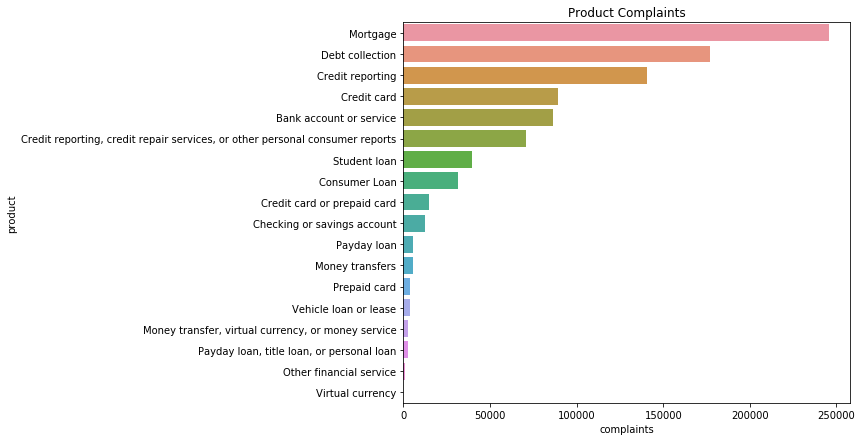

In [10]:
plt.figure(figsize=(8, 7))
sns.barplot(x='complaints', y='product', data=products)
plt.title('Product Complaints')

Grouping the complaints by product, we can see that most complaints are about Mortgages, with debt collection and credit reporting taking 2nd and 3rd place respectively.

Complaints are then further divided into sub_products. Debt collection further sub divided into 17 sub_product categories while Credit reporting, Payday loan, and Credit card categories have no further sub-categories.

In [65]:
complaints_df.groupby('Product')['sub_product'].nunique().sort_values(ascending=False)

Product
Debt collection                                                                 17
Mortgage                                                                        11
Money transfer, virtual currency, or money service                              10
Prepaid card                                                                     9
Other financial service                                                          7
Consumer Loan                                                                    6
Credit card or prepaid card                                                      6
Checking or savings account                                                      5
Bank account or service                                                          5
Payday loan, title loan, or personal loan                                        5
Vehicle loan or lease                                                            3
Credit reporting, credit repair services, or other personal consumer reports   

In [56]:
def sub_products(prod):
    '''Filter dataframe by product and return sub_products with value counts for specified product.'''
    filtered = complaints_df.loc[complaints_df['Product'] == prod]
    return filtered['sub_product'].value_counts()

In [74]:
mortgages = pd.DataFrame(sub_products('Mortgage'))
mortgages

,sub_product
Other mortgage,86637
Conventional fixed mortgage,70617
FHA mortgage,27011
Conventional adjustable mortgage (ARM),25382
Home equity loan or line of credit,11626
Conventional home mortgage,9935
VA mortgage,5928
Other type of mortgage,3994
Reverse mortgage,2396
Home equity loan or line of credit (HELOC),1257


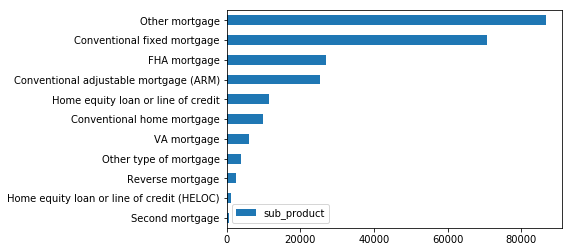

In [75]:
plt.figure(figsize=(6, 5))
mortgages.plot.barh()
plt.gca().invert_yaxis()
plt.show()

In [59]:
sub_products('Student loan')

Non-federal student loan          22283
Federal student loan servicing    14591
Private student loan               2793
Name: sub_product, dtype: int64

In [61]:
sub_products('Credit reporting')

Series([], Name: sub_product, dtype: int64)

In [11]:
list(set(complaints_df.index.month))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [12]:
def complaints_by_time(time_interval, stat):
    df = complaints_df.groupby(complaints_df.index.time_interval).complaint_ID
    return df.stat()

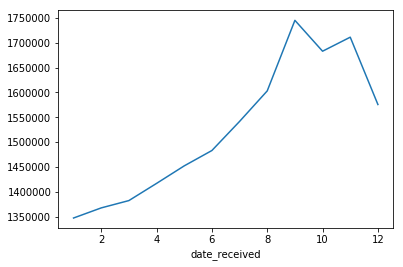

In [13]:
complaints_df.groupby(complaints_df.index.month)['complaint_ID'].mean().astype('int').plot()

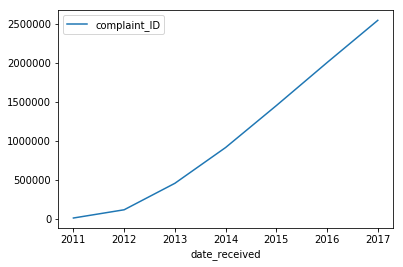

In [14]:
complaints_df.resample('A').mean().plot()